<a href="https://colab.research.google.com/github/GurashishJuneja/MMAI831-Finance/blob/main/Gurashish_Finance_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install quandl
# import quandl
import scipy.optimize as sco
import yfinance as yf
from scipy.optimize import minimize

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

3. Suppose that you want to establish a portfolio among only those S&P 500 companies with the following features: -> Amir & GJ 

Market cap between the 40-60% quantile 

Forward PE among the 30-50% quantile. 

List those companies. 


In [9]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
symbols = df['Symbol'].values.tolist()

df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [10]:
#Defining empty lists to store data

market_caps = []
forwardPEs = []
companies =[]

#creating a function to loop over symbols

for symbol in symbols:

  ticker = yf.Ticker(symbol)

  try:
    market_cap = ticker.info["marketCap"]

    forwardPE = ticker.info["forwardPE"]

    market_caps.append(market_cap)

    forwardPEs.append(forwardPE)
    companies.append(symbol)

  except:
    continue


In [36]:
#Creating a data frame

df = pd.DataFrame()
df["Company"] = companies
df["Market Cap"] = market_caps
df["Forward PE"] = forwardPEs

#Computing quantiles

df = df.dropna() #dropping any rows with missing values

market_cap_40 = df["Market Cap"].quantile(0.4)
market_cap_60 = df["Market Cap"].quantile(0.6)

forwardPE_30 = df["Forward PE"].quantile(0.3)

forwardPE_50 = df["Forward PE"].quantile(0.5)


#Filtering companies based on the criteria

filteredlist = df[(df["Market Cap"].between(market_cap_40, market_cap_60))]

pd.set_option("display.max_rows", None)

print(filteredlist)


    Company   Market Cap  Forward PE
12        A  38016102400   20.348171
16      ALB  23907209216    9.467937
18     ALGN  23641460736   29.847390
21      ALL  30998136832    9.009168
32      AIG  38112882688    6.814527
34      AWK  28721668096   28.876710
35      AMP  31464734720    8.969687
36      ABC  35059400704   13.605966
37      AME  33727711232   22.341984
41     ANSS  25908260864   30.916235
46     APTV  25740216320   15.135179
47     ACGL  28085297152   10.995607
55      AVB  25369542656   35.660680
58      BKR  28666456064   13.945000
70       BK  32813684736    7.842004
86      COF  34302468096    6.311615
90     CARR  36312600576   15.344087
94     CBRE  23275192320   12.808291
97      CNC  36882763776   10.031343
107     CHD  23478657024   28.607145
118    CTSH  32314181632   13.410256
124      ED  34127259648   18.829828
126     CEG  26040469504   15.377395
129     GLW  26780831744   12.946058
131    CSGP  31073769472   50.317883
136     CMI  30961874944   11.047980
1

In [74]:
print(len(filteredlist))

100


In [72]:
market_cap_40

23257918668.8

In [73]:
market_cap_60

38262444031.99999

In [37]:
# 3.b Forward PE among the 30-50% quantile. 


print(forwardPE_30)

print(forwardPE_50)

12.1742696
16.4445945


In [76]:
filteredlist = df[(df['Forward PE'].between(forwardPE_30, forwardPE_50))]
print(filteredlist)

KeyError: ignored

In [75]:
print(len(filteredlist))

100


In [ ]:
filteredlist = df[(df['Forward PE'].between(forwardPE_30, forwardPE_50))]
print(filteredlist)

Question 4: Use the same companies we picked in the Session - 2 Frontier Analysis example, and the same time period (2017-2022). Assume risk free rate was 2.78% (constant for this question). 

One the first business day of January, 2022, use the data from 2017-2021 to find the portfolio that has the highest Sharpe ratio (tangent portfolio).  You can use the monthly returns. 

Use the data from 2022, compute the mean and standard deviation of the monthly returns for the equally weighted portfolio (rebalanced at the beginning of each month). 

Compute the mean and standard deviation for the monthly returns of the tangent portfolio. 

Compare the results. 

In [42]:
"""
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize

data.index = pd.to_datetime(data.index)

# Define the list of companies and the risk-free rate
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']  # Replace these with your actual companies
risk_free_rate = 2.78 / 100  # Convert to decimal

# Fetch historical stock data
data = yf.download(companies, start='2017-01-01', end='2022-12-31')
data = data['Adj Close']  # Use adjusted close prices

# Calculate monthly returns
returns = data.resample('M').ffill().pct_change()

# Split the data into two periods
returns_2017_2021 = returns['2017':'2021']
returns_2022 = returns['2022']"""

"\nimport pandas as pd\nimport numpy as np\nimport yfinance as yf\nfrom scipy.optimize import minimize\n\ndata.index = pd.to_datetime(data.index)\n\n# Define the list of companies and the risk-free rate\ncompanies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']  # Replace these with your actual companies\nrisk_free_rate = 2.78 / 100  # Convert to decimal\n\n# Fetch historical stock data\ndata = yf.download(companies, start='2017-01-01', end='2022-12-31')\ndata = data['Adj Close']  # Use adjusted close prices\n\n# Calculate monthly returns\nreturns = data.resample('M').ffill().pct_change()\n\n# Split the data into two periods\nreturns_2017_2021 = returns['2017':'2021']\nreturns_2022 = returns['2022']"

In [55]:
#the above code did not work

In [56]:
pd.reset_option('display.max_rows')


In [57]:

# Define the stock symbols
stocks = ['AAPL', 'AMZN', 'GOOGL', 'BAC', 'MCD', 'CAT', 'TSLA', 'PFE']

# Create an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through each stock symbol and retrieve the data
for stock in stocks:
    # Retrieve the daily stock data for the year 2022
    stock_data = yf.download(stock, start='2017-01-01', end='2022-12-31')
       
    # Add a column for the stock symbol
    stock_data.loc[:, 'ticker'] = stock
    
    # Append the stock data to the main DataFrame
    data = pd.concat([data, stock_data], axis=0)

# Reset the index of the DataFrame
data.reset_index(inplace=True)

# Select the desired columns
data = data[['Date', 'ticker', 'Adj Close']]

# Rename the columns to match the original code
data.columns = ['date', 'ticker', 'adj_close']

# Print the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        date ticker  adj_close
0 2017-01-03   AAPL  27.095846
1 2017-01-04   AAPL  27.065516
2 2017-01-05   AAPL  27.203159
3 2017-01-06   AAPL  27.506428
4 2017-01-09   AAPL  27.758369


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       12080 non-null  datetime64[ns]
 1   ticker     12080 non-null  object        
 2   adj_close  12080 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 283.2+ KB


In [59]:
# Check if all the companies and time period are correctly selected  
print('The companies are:', data.ticker.unique(), 'and there is', len(data),'date entry points')
print('The date range of stock data is from', data.date.min(), ' to ',data.date.max())

The companies are: ['AAPL' 'AMZN' 'GOOGL' 'BAC' 'MCD' 'CAT' 'TSLA' 'PFE'] and there is 12080 date entry points
The date range of stock data is from 2017-01-03 00:00:00  to  2022-12-30 00:00:00


In [60]:
# keep this 'data' as original and use df. We drop the level(0), which is the adj_closed written on th first line, no need for it
df = data.set_index('date')
table = df.pivot(columns='ticker')
table.columns = table.columns.droplevel(0)
table.head()

ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
date,,,,,,,,
2017-01-03,27.095846,37.683498,19.755686,79.812828,40.400501,103.010788,24.618330,14.466000
2017-01-04,27.065516,37.859001,20.123966,79.456192,40.388500,102.890213,24.834673,15.132667
2017-01-05,27.203159,39.022499,19.887215,78.972160,40.651001,103.079681,25.073395,15.116667
2017-01-06,27.506428,39.799500,19.887215,79.006134,41.260502,103.992508,24.976416,15.267333
2017-01-09,27.758369,39.846001,19.773220,78.437195,41.359001,103.708305,24.968948,15.418667


Text(0, 0.5, 'price in $')

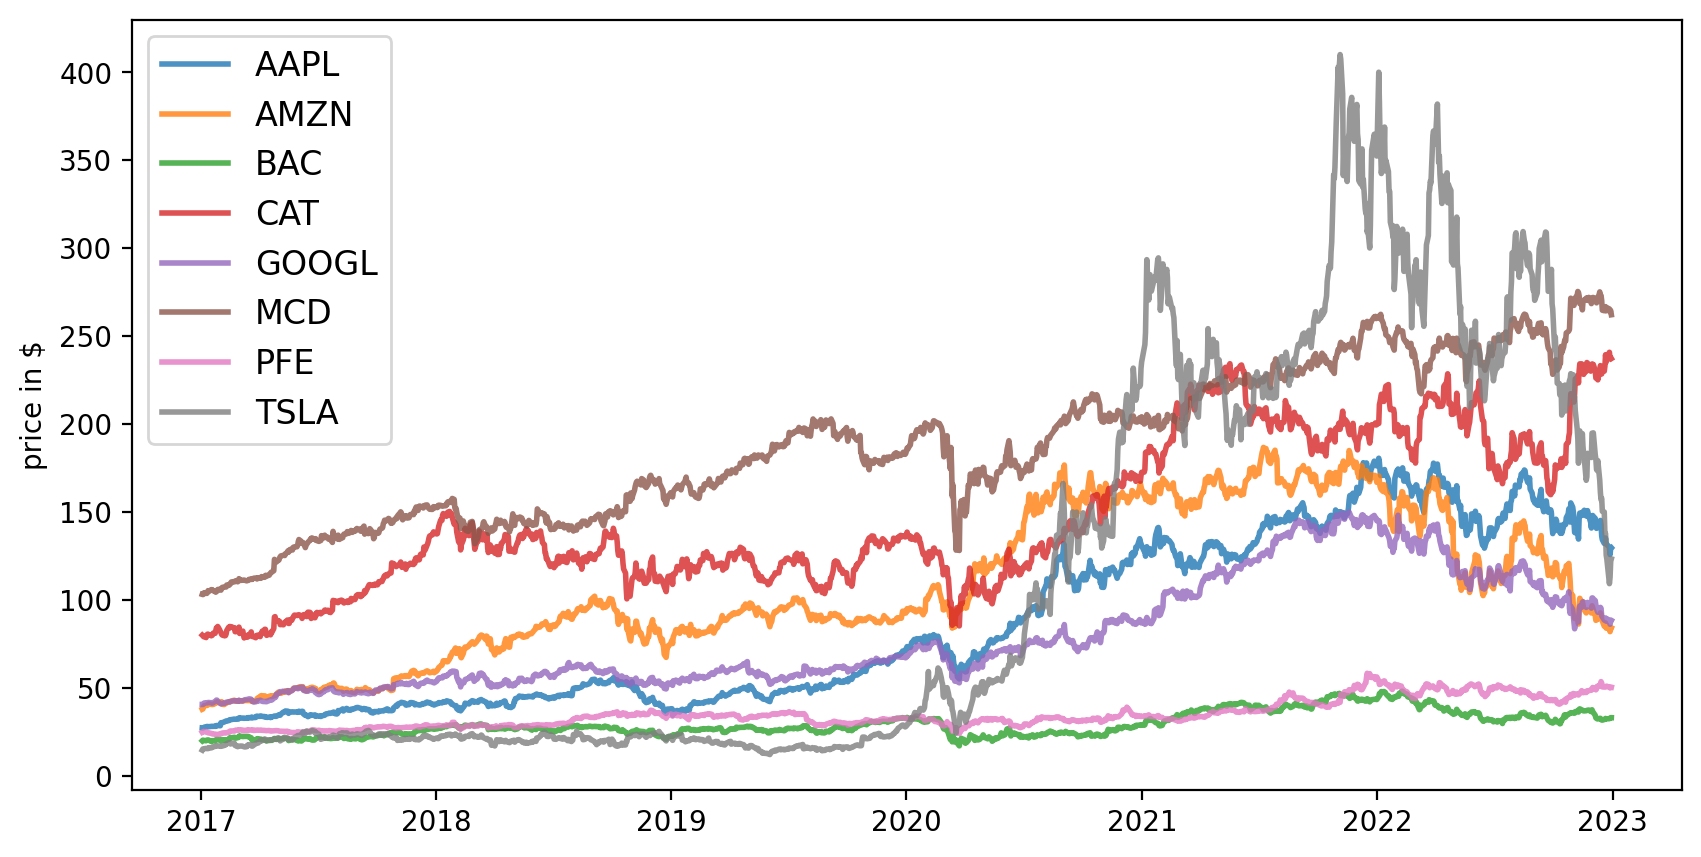

In [61]:
plt.figure(figsize=(10, 5))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=2, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

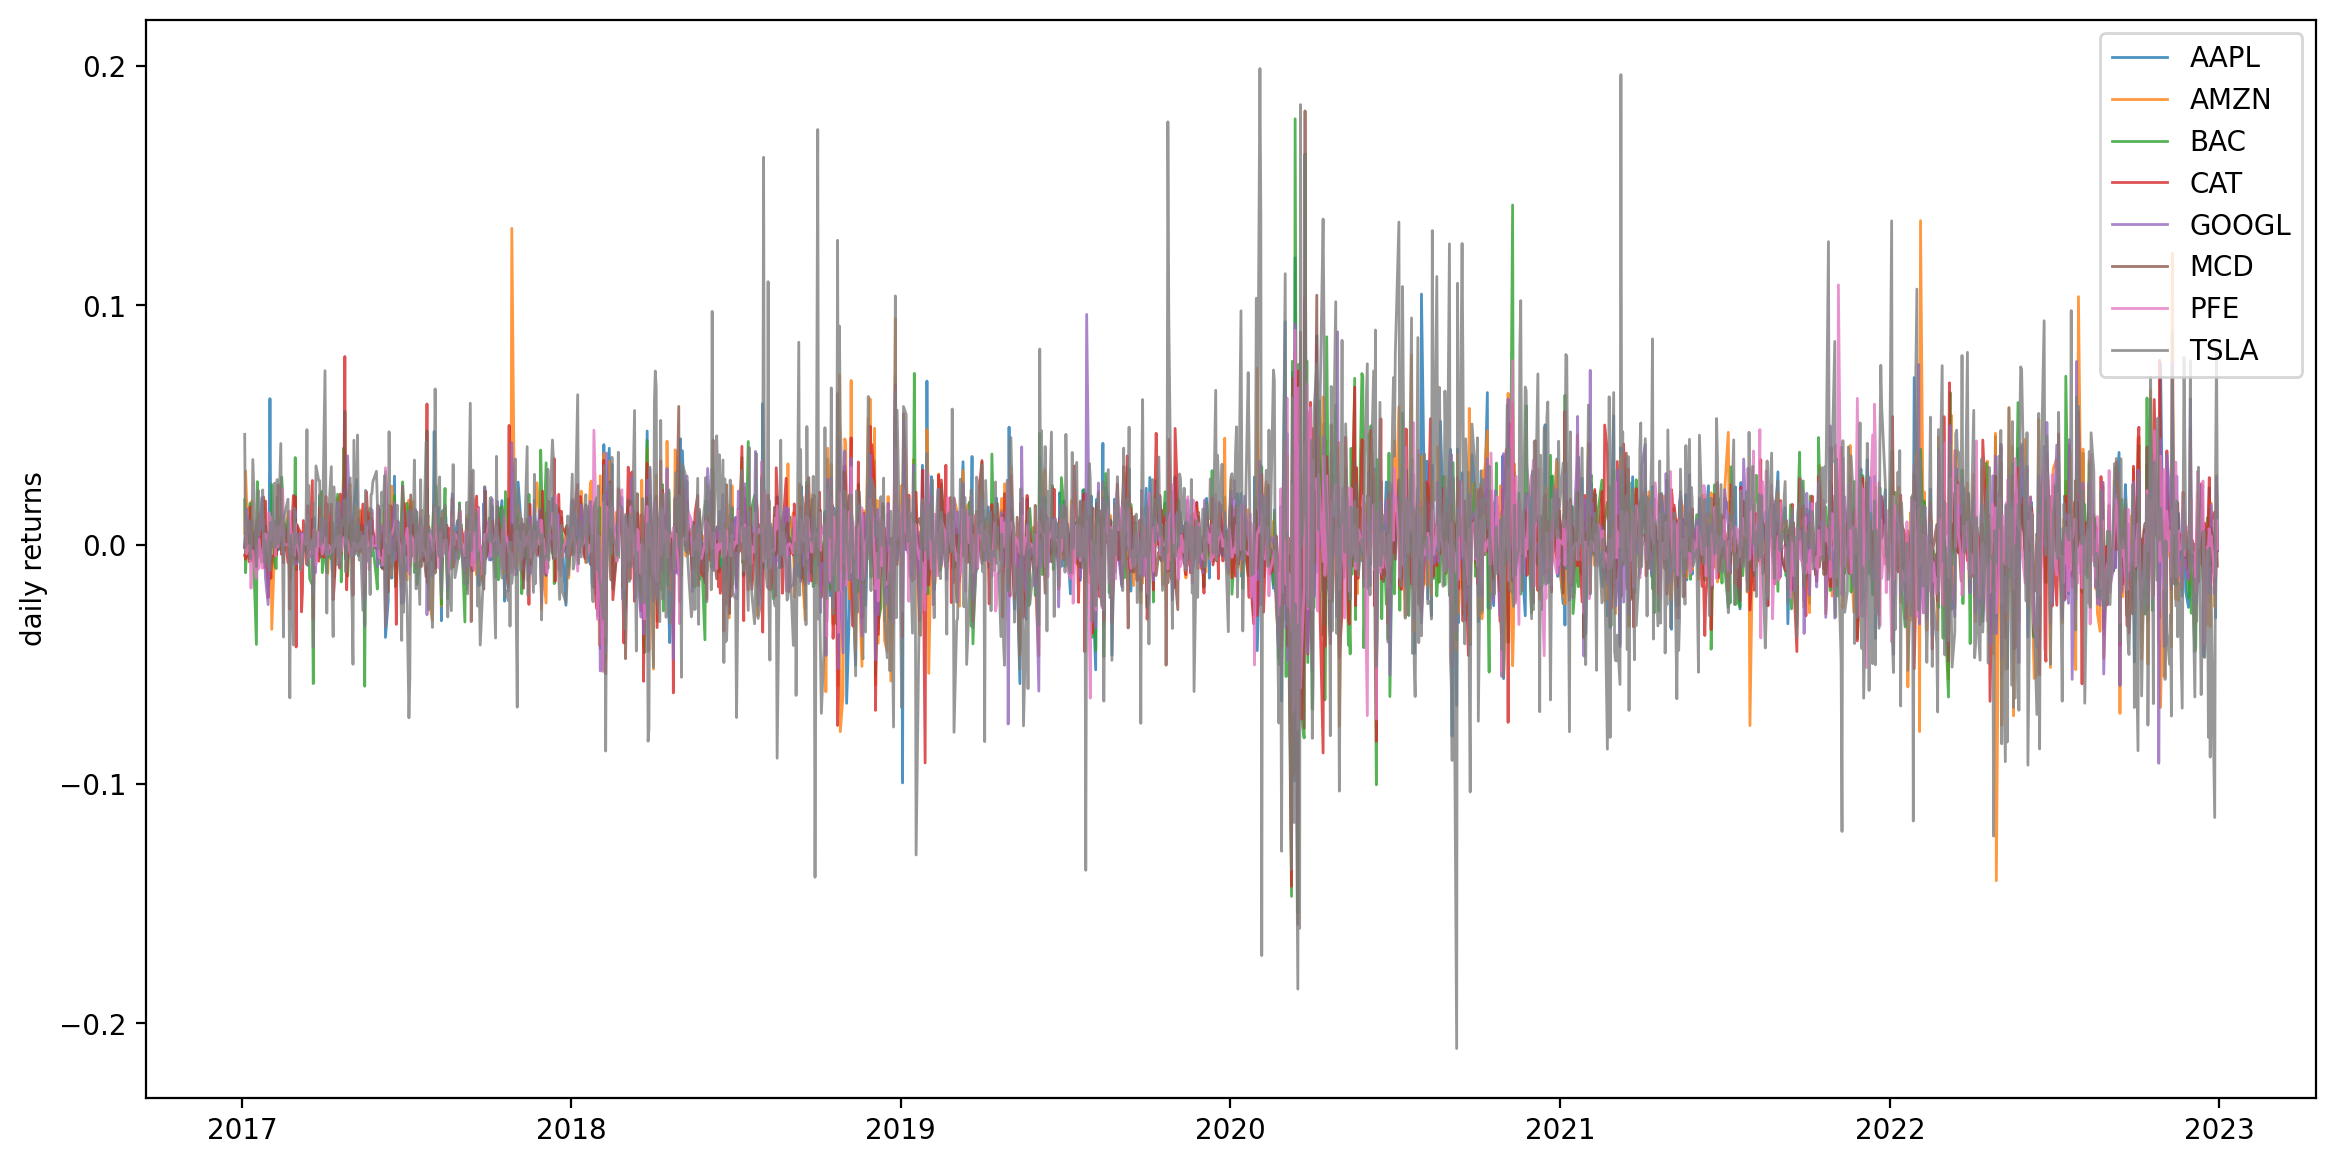

In [62]:
# Calculate the daily percentage returns of the table and then plot the daily returns for each column
# Need daily returns for corelation analysis
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=1, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=10)
plt.ylabel('daily returns')

In [63]:
#Estimate the imputs needed for the MV Analysis
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 2500 # number of random portfolios
risk_free_rate = 0.0278

4.a One the first business day of January, 2022, use the data from 2017-2021 to find the portfolio that has the highest Sharpe ratio (tangent portfolio).  You can use the monthly returns. 

In [64]:
returns = table.pct_change().dropna()
returns

ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
date,,,,,,,,
2017-01-04,-0.001119,0.004657,0.018642,-0.004468,-0.000297,-0.001171,0.008788,0.046085
2017-01-05,0.005086,0.030732,-0.011765,-0.006092,0.006499,0.001841,0.009612,-0.001057
2017-01-06,0.011148,0.019912,0.000000,0.000430,0.014994,0.008856,-0.003868,0.009967
2017-01-09,0.009159,0.001168,-0.005732,-0.007201,0.002387,-0.002733,-0.000299,0.009912
2017-01-10,0.001009,-0.001280,0.017295,0.015806,-0.001414,-0.001495,-0.000896,-0.006096
...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.017425,0.002470,0.009809,0.016750,0.006773,0.003679,-0.017551
2022-12-27,-0.013878,-0.025924,0.001848,0.013632,-0.020621,-0.002728,-0.013506,-0.114089
2022-12-28,-0.030685,-0.014692,0.007378,-0.015464,-0.015677,-0.006483,-0.006454,0.033089


In [66]:
returns_2017_2021 = returns['2017':'2021'].resample('M').agg(lambda x: (x + 1).prod() - 1)  # convert to monthly returns

In [67]:
import numpy as np

from scipy.optimize import minimize

risk_free_rate = 0.0278

num_assets = len(returns_2017_2021.columns)

init_guess = np.repeat(1/num_assets, num_assets)

constraints = ({"type": "eq","fun": lambda x: np.sum(x)-1})

bounds = tuple((0, 1) for asset in range(num_assets))



In [68]:
def sharpe_ratio(weights):
  
  weights = np.array(weights)

  portfolio_return = np.sum(returns_2017_2021.mean()*weights) *12 #annualizing the return

  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_2017_2021.cov() *12, weights)))

  sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

  return sharpe_ratio


In [70]:
#Running the optimization algorithm

optimal_weights = minimize(sharpe_ratio, init_guess, method = "SLSQP", bounds = bounds, constraints = constraints)

In [71]:
print(optimal_weights.x)

[0.00000000e+00 2.97282125e-16 1.00000000e+00 2.43555176e-15
 2.50174939e-15 0.00000000e+00 3.86574912e-15 0.00000000e+00]
